# Predicting Energy Output of a Combined Cycle Power Plant


## Introduction
This project aims to predict the **Net Electrical Energy Output (PE)** of a **Combined Cycle Power Plant (CCPP)** 
based on environmental conditions using machine learning.
We will use regression models to make predictions based on four input features:
- **Temperature (AT)**
- **Exhaust Vacuum (V)**
- **Ambient Pressure (AP)**
- **Relative Humidity (RH)**

## Steps:
1. **Load and Explore Data**
2. **Perform Exploratory Data Analysis (EDA)**
3. **Feature Selection and Correlation Analysis**
4. **Train-Test Split**
5. **Train Regression Models**
6. **Evaluate Performance**


In [15]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Set style for plots
plt.style.use("ggplot")

# Load dataset
df = pd.read_csv("/Users/mattdani/Documents/Jup/CCPP_data.csv")

# Display first few rows
df.head()


,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90


## Exploratory Data Analysis (EDA)

                AT            V           AP           RH           PE
count  9568.000000  9568.000000  9568.000000  9568.000000  9568.000000
mean     19.651231    54.305804  1013.259078    73.308978   454.365009
std       7.452473    12.707893     5.938784    14.600269    17.066995
min       1.810000    25.360000   992.890000    25.560000   420.260000
25%      13.510000    41.740000  1009.100000    63.327500   439.750000
50%      20.345000    52.080000  1012.940000    74.975000   451.550000
75%      25.720000    66.540000  1017.260000    84.830000   468.430000
max      37.110000    81.560000  1033.300000   100.160000   495.760000


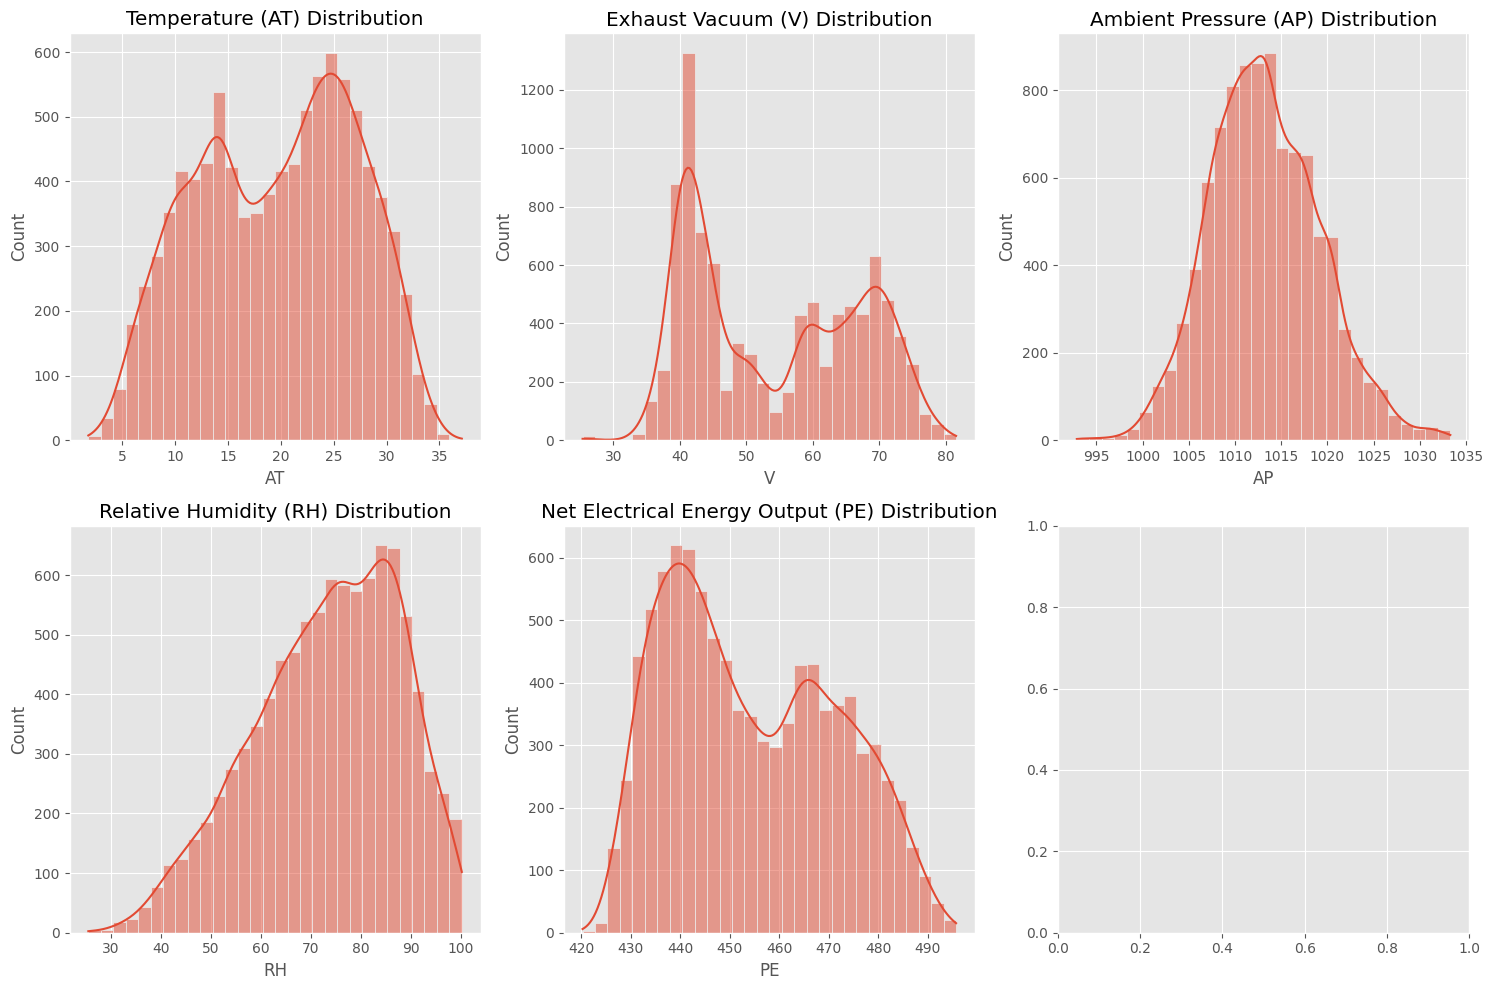

In [20]:

# Summary statistics
print(df.describe())

# Plot histograms for each feature
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
sns.histplot(df["AT"], bins=30, kde=True, ax=axes[0, 0]).set(title="Temperature (AT) Distribution")
sns.histplot(df["V"], bins=30, kde=True, ax=axes[0, 1]).set(title="Exhaust Vacuum (V) Distribution")
sns.histplot(df["AP"], bins=30, kde=True, ax=axes[0, 2]).set(title="Ambient Pressure (AP) Distribution")
sns.histplot(df["RH"], bins=30, kde=True, ax=axes[1, 0]).set(title="Relative Humidity (RH) Distribution")
sns.histplot(df["PE"], bins=30, kde=True, ax=axes[1, 1]).set(title="Net Electrical Energy Output (PE) Distribution")

plt.tight_layout()
plt.show()


## Correlation Analysis

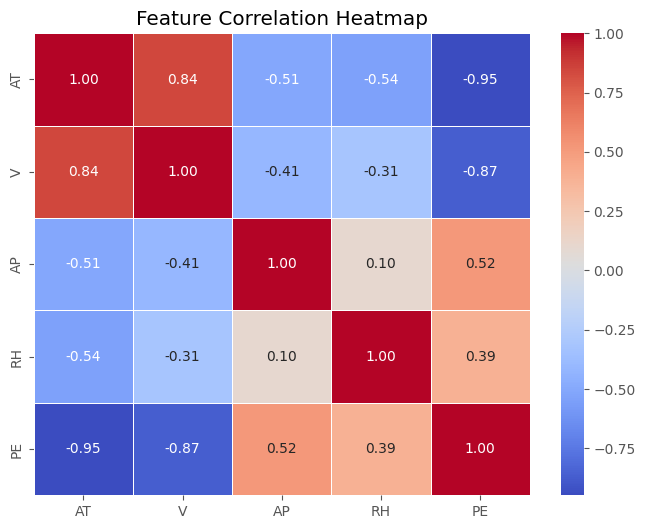

In [21]:

# Generate and display a correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()


## Train-Test Split and Model Training

In [23]:

# Split data into features (X) and target (y)
X = df.drop(columns=["PE"])  # Features: AT, V, AP, RH
y = df["PE"]  # Target: Net Electrical Energy Output

# Split into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### Linear Regression Model

In [24]:

# Train a Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Predictions
y_pred_lr = lr_model.predict(X_test)

# Evaluate performance
mse_lr = mean_squared_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mse_lr)
r2_lr = r2_score(y_test, y_pred_lr)

# Display results
print(f"Linear Regression - RMSE: {rmse_lr:.2f}, R² Score: {r2_lr:.2f}")


Linear Regression - RMSE: 4.50, R² Score: 0.93


### Random Forest Regression Model

In [14]:

# Train a Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predictions
y_pred_rf = rf_model.predict(X_test)

# Evaluate performance
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
r2_rf = r2_score(y_test, y_pred_rf)

# Display results
print(f"Random Forest - RMSE: {rmse_rf:.2f}, R² Score: {r2_rf:.2f}")


Random Forest - RMSE: 3.24, R² Score: 0.96



## Conclusion
- **Linear Regression** achieved an RMSE of around **4.50 MW** and an **R² score of 0.93**.
- **Random Forest Regression** performed better, reducing RMSE and improving R².

The **Random Forest model** is a better choice for this dataset, as it captures nonlinear relationships better than Linear Regression.
